In [24]:
import sys
from pathlib import Path

# Add project root to sys.path (go up 2 levels from notebook to project root)
project_root = Path.cwd().parent.parent
if str(project_root) not in sys.path:
  sys.path.insert(0, str(project_root))

# Now import works
from src.research import (
    load_orders,
    build_trade_totals,
    compute_basic_stats,
    compute_win_loss_stats,
    compute_expectancy,
    classify_exit_reasons,
    compute_exit_type_stats,
    get_exit_hour_distribution,
    merge_market_data,
    compute_distribution_stats,
    get_worst_trades,
    get_best_trades,
    compute_range_bucketed_stats
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
orders = load_orders("../data/baseline_v1_orders_02_13_2026.csv", start_date="2022-04-01")
trades = build_trade_totals(orders)

/Users/jplatta/repos/trade_lab/src/research/backtest_loader.py:85: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  trade_totals["month"] = trade_totals["exit_time"].dt.to_period("M")


In [3]:
orders.head()

,Time,Symbol,Price,Quantity,Value,entry
0,2022-04-01 15:50:00-04:00,SPXW 220404P04440000,0.95,1,0.95,False
1,2022-04-01 15:50:00-04:00,SPXW 220404P04460000,1.70,-1,-1.70,False
2,2022-04-01 15:50:00-04:00,SPXW 220404C04600000,0.85,-1,-0.85,False
3,2022-04-01 15:50:00-04:00,SPXW 220404C04620000,0.30,1,0.30,False
4,2022-04-04 10:00:00-04:00,SPXW 220404P04460000,0.15,1,0.15,False


In [4]:
trades.head()

,exit_time,value,month
trade,,,
0,2022-04-04 10:00:00-04:00,0.70,2022-04
1,2022-04-06 10:00:00-04:00,-5.90,2022-04
2,2022-04-08 11:00:00-04:00,1.20,2022-04
3,2022-04-11 13:00:00-04:00,-1.55,2022-04
4,2022-04-13 10:00:00-04:00,0.75,2022-04


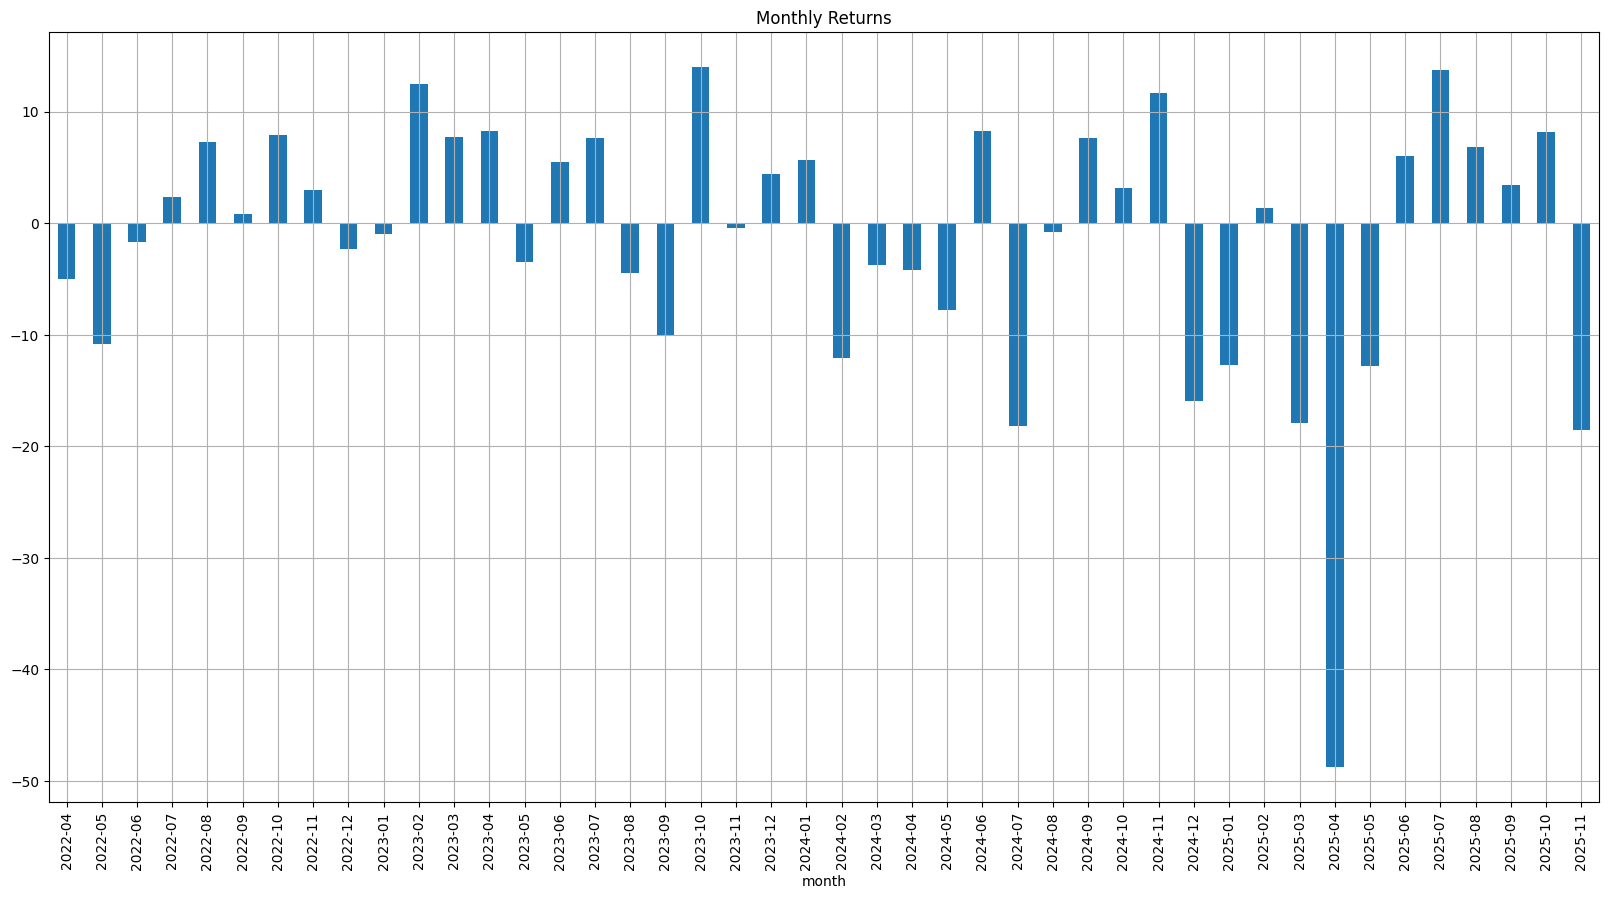

In [5]:
ax = trades.groupby('month')['value'].sum().plot(kind='bar', figsize=(20,10), title='Monthly Returns', grid=True)

In [6]:
stats = compute_basic_stats(trades)
for k, v in stats.items():
    print(f'{k}: {v}')

mean_return: -0.07726638772663878
median_return: 0.8000000000000002
std_return: 2.520832043771451
min_return: -15.899999999999997
max_return: 2.0999999999999996
total_pnl: -55.400000000000006


In [7]:
win_loss_stats = compute_win_loss_stats(trades)
for k, v in win_loss_stats.items():
    print(f'{k}: {v}')

wins: 592
losses: 125
win_rate: 0.8256624825662483
avg_win: 0.8528716216216216
avg_loss: -4.4824
largest_win: 2.0999999999999996
largest_loss: -15.899999999999997


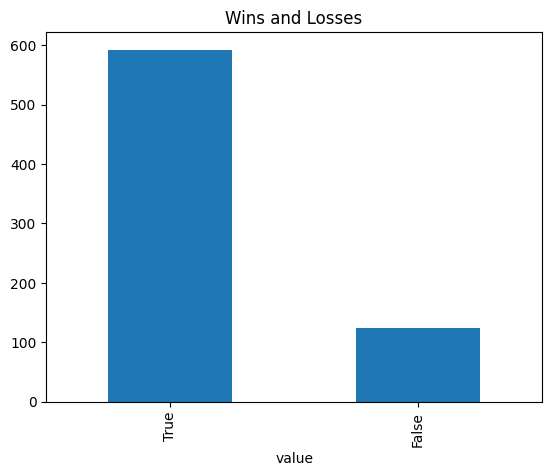

In [8]:
ax = trades['value'].gt(0).value_counts().plot(kind='bar', title="Wins and Losses")

In [9]:
expectancy = compute_expectancy(trades)
win_rate = expectancy['win_rate']
print(expectancy)

{'expectancy': np.float64(-0.07726638772663863), 'win_rate': np.float64(0.8256624825662483), 'avg_win': np.float64(0.8528716216216216), 'avg_loss': np.float64(-4.4824)}


In [10]:
dist_stats = compute_distribution_stats(trades)
for k,v in dist_stats.items():
    print(f'{k}: {v}')

skew: -3.0774468142494635
kurtosis: 9.98373430059405
percentiles: {'p1': np.float64(-10.642000000000001), 'p5': np.float64(-6.049999999999999), 'p10': np.float64(-3.8500000000000005), 'p25': np.float64(0.5499999999999999), 'p50': np.float64(0.8000000000000002), 'p75': np.float64(0.9500000000000001), 'p90': np.float64(1.1), 'p95': np.float64(1.2), 'p99': np.float64(1.4420000000000015)}


Text(0.5, 1.0, 'Losses')

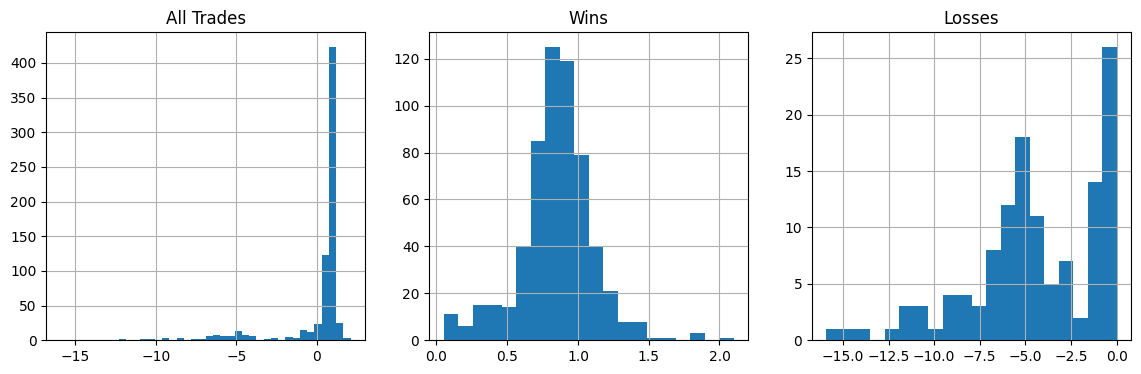

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

trades['value'].hist(bins=40, ax=axes[0])
trades[trades['value'] > 0.0]['value'].hist(bins=20, ax=axes[1])
trades[trades['value'] <= 0.0]['value'].hist(bins=20, ax=axes[2])

axes[0].set_title("All Trades")
axes[1].set_title("Wins")
axes[2].set_title("Losses")

In [12]:
worst_trades = get_worst_trades(trades)
best_trades = get_best_trades(trades)

In [13]:
worst_trades

,exit_time,value,month
trade,,,
595,2025-04-23 10:00:00-04:00,-15.90,2025-04
442,2024-07-24 10:00:00-04:00,-14.50,2024-07
205,2023-05-02 11:00:00-04:00,-13.95,2023-05
543,2025-01-27 10:00:00-05:00,-12.45,2025-01
276,2023-09-21 10:00:00-04:00,-11.90,2023-09
418,2024-05-31 16:00:00-04:00,-11.90,2024-05
528,2024-12-30 10:00:00-05:00,-11.45,2024-12
586,2025-04-03 10:00:00-04:00,-10.65,2025-04
359,2024-02-22 10:00:00-05:00,-10.60,2024-02


In [14]:
best_trades

,exit_time,value,month
trade,,,
84,2022-09-27 10:00:00-04:00,2.10,2022-09
602,2025-05-05 11:00:00-04:00,1.85,2025-05
387,2024-04-10 10:00:00-04:00,1.85,2024-04
96,2022-10-17 11:00:00-04:00,1.80,2022-10
159,2023-02-09 10:00:00-05:00,1.65,2023-02
40,2022-07-05 12:00:00-04:00,1.55,2022-07
716,2025-11-14 15:50:00-05:00,1.45,2025-11
162,2023-02-15 12:00:00-05:00,1.45,2023-02
31,2022-06-16 12:00:00-04:00,1.40,2022-06


In [15]:
returns = trades['value'].copy()

sorted_returns = returns.sort_values()  # ascending = worst first
total_pnl = returns.sum()
print('total pnl: ', total_pnl)

for n in [1, 5, 10]:
    worst_n = sorted_returns.head(n).sum()
    print(f"Worst {n} trades sum:", worst_n)
    print(f"Contribution % of total P&L:", worst_n / total_pnl)

total pnl:  -55.400000000000006
Worst 1 trades sum: -15.899999999999997
Contribution % of total P&L: 0.28700361010830316
Worst 5 trades sum: -68.69999999999999
Contribution % of total P&L: 1.2400722021660646
Worst 10 trades sum: -123.64999999999998
Contribution % of total P&L: 2.231949458483754


## Remove Worst Trades

In [16]:
less_worst_trades = trades.drop(trades.nsmallest(15, 'value').index)

print('mean return: ', less_worst_trades['value'].mean())
print('std return: ', less_worst_trades['value'].std())
print('median return: ', less_worst_trades['value'].median())
print('---')

avg_win = less_worst_trades[less_worst_trades['value'] > 0]['value'].mean()
print('avg win: ', avg_win)
print('largest win: ', less_worst_trades['value'].max())
print('-----')
avg_loss = less_worst_trades[less_worst_trades['value'] <= 0]['value'].mean()
print('avg loss: ', avg_loss)
print('largest loss: ', less_worst_trades['value'].min())
print('---')
expectancy = (win_rate * avg_win) + ((1.0 - win_rate) * avg_loss)
print('expectancy: ', expectancy)

mean return:  0.1646011396011396
std return:  1.8985758752906094
median return:  0.8250000000000001
---
avg win:  0.8528716216216216
largest win:  2.0999999999999996
-----
avg loss:  -3.5395454545454546
largest loss:  -8.649999999999999
---
expectancy:  0.08710853302903532


## Exit Conditions

In [17]:
trades_with_exits = classify_exit_reasons(trades)

In [18]:
trades_with_exits.head()

,exit_time,value,month,exit_reason
trade,,,,
0,2022-04-04 10:00:00-04:00,0.70,2022-04,prof_target_reached
1,2022-04-06 10:00:00-04:00,-5.90,2022-04,max_loss
2,2022-04-08 11:00:00-04:00,1.20,2022-04,prof_target_reached
3,2022-04-11 13:00:00-04:00,-1.55,2022-04,forced_exit
4,2022-04-13 10:00:00-04:00,0.75,2022-04,prof_target_reached


In [19]:
exit_stats = compute_exit_type_stats(trades_with_exits)
exit_stats

,count,win_rate,avg_pnl,std_pnl,total_pnl
exit_reason,,,,,
afternoon_prof,134,1.000000,0.690672,0.315583,92.55
forced_exit,77,0.272727,-1.370130,2.286376,-105.50
max_loss,69,0.000000,-6.411594,3.244103,-442.40
prof_target_reached,437,1.000000,0.915217,0.197381,399.95


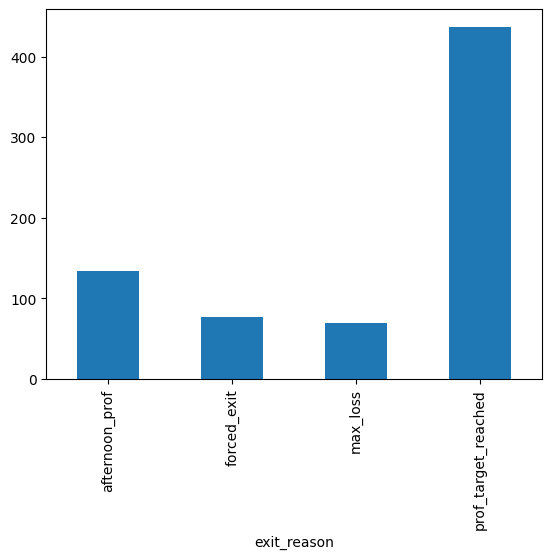

In [20]:
ax = exit_stats['count'].plot(kind='bar')

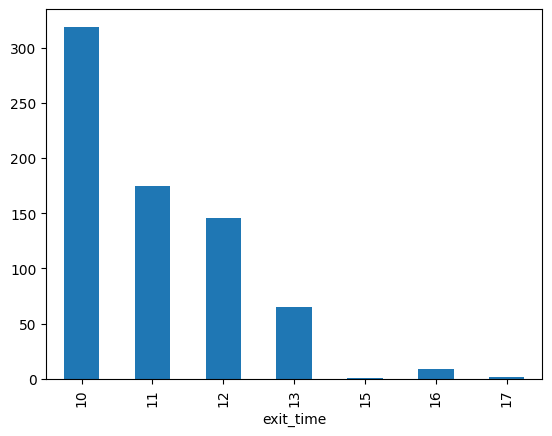

In [21]:
exit_hours = get_exit_hour_distribution(trades_with_exits)
ax = exit_hours.plot(kind='bar')

## SPX Range

In [25]:
trades_with_market = merge_market_data(trades, '../data/SPX_daily_2022-2025.csv')

In [26]:
trades_with_market.head()

,exit_time,value,month,date,open,high,low,close,range
0,2022-04-04 10:00:00-04:00,0.70,2022-04,2022-04-04,4547.97,4583.50,4539.21,4582.64,44.29
1,2022-04-06 10:00:00-04:00,-5.90,2022-04,2022-04-06,4494.17,4503.94,4450.04,4481.15,53.90
2,2022-04-08 11:00:00-04:00,1.20,2022-04,2022-04-08,4494.15,4520.41,4474.60,4488.28,45.81
3,2022-04-11 13:00:00-04:00,-1.55,2022-04,2022-04-11,4462.64,4464.35,4408.38,4412.53,55.97
4,2022-04-13 10:00:00-04:00,0.75,2022-04,2022-04-13,4394.30,4453.92,4392.70,4446.59,61.22


In [27]:
range_stats = compute_range_bucketed_stats(trades_with_market)

In [32]:
range_stats

,value_count,value_win_rate,value_avg_pnl,range_avg_range
range_bucket,,,,
"(12.319, 23.396]",36,0.972222,0.761111,19.273056
"(23.396, 26.74]",36,0.916667,0.475000,25.282778
"(26.74, 29.462]",36,0.972222,0.730556,28.231111
"(29.462, 32.706]",36,0.944444,0.641667,30.968056
"(32.706, 34.89]",37,0.945946,0.747297,33.875135
"(34.89, 37.194]",34,0.882353,0.382353,35.777353
"(37.194, 39.702]",36,0.805556,0.123611,38.400556
"(39.702, 42.468]",36,0.916667,0.769444,41.045556
"(42.468, 45.374]",36,0.888889,0.408333,44.018889


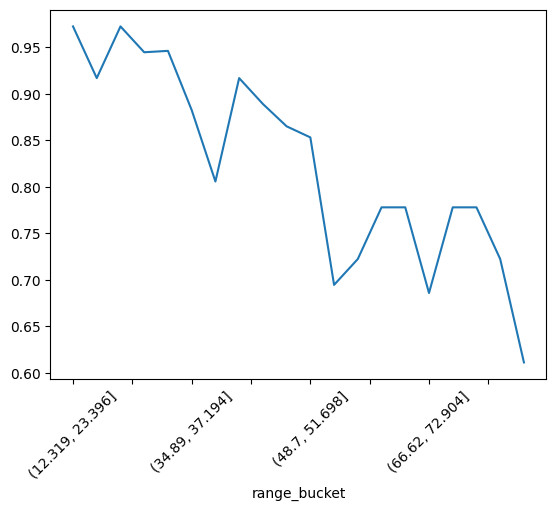

In [31]:
ax = range_stats['value_win_rate'].plot(rot=45)

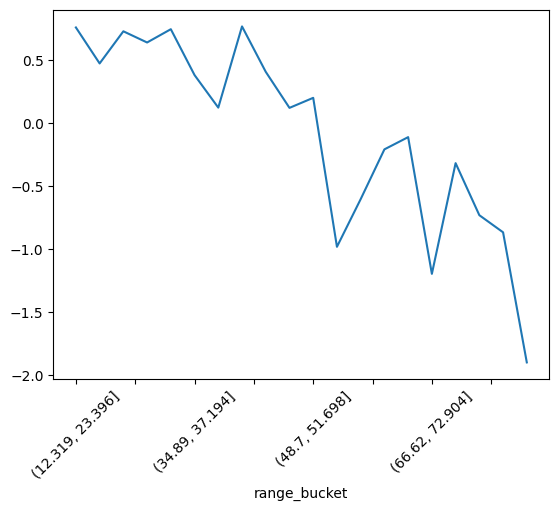

In [33]:
ax = range_stats['value_avg_pnl'].plot(rot=45)